## This will be an active workbook for comparing differences between different runs of tractography for each subject 

#### currently it is still 'producing' some permanant files - I should probably change this to a different notebook and simply load in and analyse them data frames - will do this when I have a more structured idea of what data and metrics would be best to compare

the first cell does the usual imports and sets various variables and the subject dicts 

currently I then import and filter out run 3 from the global metrics csv, similar with strength - calculate absolute and percentage changes, I will then possibly extend similarly to other metrics,


In [2]:
# this cell imports the necessary packages - sets variables to point to string keys - sets the sub case and control
# dictionaries as well as creating lists of global node and othe metrics


import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

# set variables that will point to dictionary keys - with the type/output will be in the dict, note these 
# are not based on the output of the analagous networkx function but how I have written into dict


#data/matrices
graph = "graph" #networkx graph basically dictionaries all the way down
data = "data" #pandas data frame 
bin_mat = "binary_matrix" #numpy array 
bin_df = "binary_df"
data_numpy = "data_as_numpy_array" #numpy array
norm_lap = "normalised_laplacian" #numpy array?

#global metrics 
gl_eff = "global_efficiency" #float
loc_eff = "local_efficiency" #float
clus_coef = "clusetering_coefficent" #float
ave_path_length = "ave_path_length" #float
clique_num = "clique_number" #int (poss float but always integer valued)
ass_coef = "assortativity_coefficient" #float
transitivity = "transitivity" #float
rich_club_coeff = "rich_club_coefficient" #currently not working would be float
sw_sigma = "" #currently not working would be float
sw_gamma = "" #currently not working would be float
ave_strength = "average_node_strength" #float
no_edges = "number_of_edges" #int
ave_deg = "average_degree" #int

#individual node/edge metrics and dicts
deg = "degree" #dictionary - nodes as key degree as values 
bet_cent = "betweenness_centrality" # dictionary - nodes as key betweeness as values 
edge_bet_cent = "edge_betweenness_centrality" # dictionary - edge tuple as key edgebetweeness centrality as values 
eigen_cent = "eigenvector_centrality" # dictionary - nodes as eigenvalue centrality as values 
deg_cent = "degree_centrality" # dictionary - nodes as key degree centrality as values 
strength = "node_strength"  # dictionary - nodes as key strength as values 

#other
deg_hist = "degree_histogram" #list - index is degree value is how many nodes with that degree 
norm_lap_spec = "normalised_laplacian_spectrum" #list of floats?


#subject dictionary with a list of runs - corresponds to how connectome file is saved for now hand written 
sub_dict = {"NENAH004" : ["orig", "run2"], "NENAH010" :  ["orig", "run2"], "NENAH011" :  ["orig", "run2"],
                "NENAH012" : ["orig", "run2"], "NENAH015" : ["orig", "run2"], "NENAH016" : ["orig", "run2"], 
                "NENAH022" : ["orig", "run2"], "NENAH024" : ["orig", "run2"], "NENAHC002" : ["orig", "run2", "run3"], 
                "NENAHC003" : ["orig", "run2","run3"], "NENAHC010" : ["orig", "run2", "run3"],
                "NENAHC013" : ["orig", "run2", "run3"], "NENAHC016" : ["orig", "run2", "run3"],
                "NENAHC018" : ["orig", "run2", "run3"], "NENAHC020": ["orig", "run2", "run3"],
                "NENAHC025" : ["orig", "run2"]
           }

case_dict = {"NENAH004" : ["orig", "run2"], "NENAH010" :  ["orig", "run2"], "NENAH011" :  ["orig", "run2"],
                "NENAH012" : ["orig", "run2"], "NENAH015" : ["orig", "run2"], "NENAH016" : ["orig", "run2"], 
                "NENAH022" : ["orig", "run2"], "NENAH024" : ["orig", "run2"]
            }

control_dict = { "NENAHC002" : ["orig", "run2", "run3"],  "NENAHC003" : ["orig", "run2", "run3"], 
                "NENAHC010" : ["orig", "run2", "run3"],"NENAHC013" : ["orig", "run2", "run3"],
                "NENAHC016" : ["orig", "run2", "run3"], "NENAHC018" : ["orig", "run2", "run3"],
                "NENAHC020": ["orig", "run2", "run3"], "NENAHC025" : ["orig", "run2",]
             }

#create the lists which might be usuefull in automating data frame creation
#note these should be strings
global_metrics = [gl_eff, loc_eff, clus_coef, ave_path_length, clique_num,
                  transitivity, ave_strength, no_edges, ave_deg] 

node_metrics = [deg, strength, bet_cent, eigen_cent, deg_cent]

other_metrics = [deg_hist, norm_lap_spec, edge_bet_cent,]

binary_thresholds = [0, 0.05, 0.02, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]

In [ ]:
# percentage differences in global metrics 
# centrality differences in unweightd?
# strength comparison in unthresholded df 
# degree comparison at various thresholds 




In [58]:
gl_df = pd.read_csv('global_metrics.csv', index_col = 0 )
gl_df.drop(columns = ['clique_number', "average_degree"],axis = 1,  inplace=True)
# gl_df.head(40),
gl_df.drop(index=["NENAHC002run3",  "NENAHC003run3", "NENAHC010run3", "NENAHC013run3", "NENAHC016run3", "NENAHC018run3",
           "NENAHC020run3"], axis =0, inplace=True)
gl_df.head(40)


,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,transitivity,average_node_strength,number_of_edges
sub-id,,,,,,,
NENAH004orig,0.793412,0.876942,0.753892,1.413368,0.713124,0.905938,2046
NENAH004run2,0.794607,0.878639,0.757279,1.410786,0.715011,0.907146,2054
NENAH010orig,0.859725,0.907628,0.815256,1.280551,0.792585,1.221500,2508
NENAH010run2,0.858147,0.905623,0.811247,1.283706,0.789491,1.220287,2497
NENAH011orig,0.786957,0.877841,0.755688,1.426277,0.705985,1.073708,2001
NENAH011run2,0.790591,0.879621,0.759244,1.418818,0.712122,1.073263,2026
NENAH012orig,0.823867,0.892446,0.784894,1.352266,0.749211,1.176797,2258
NENAH012run2,0.827405,0.895809,0.791620,1.345382,0.756050,1.176823,2283
NENAH015orig,0.838067,0.895427,0.790854,1.323867,0.766103,1.122620,2357


In [14]:
gl_df.head()

,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,transitivity,average_node_strength,number_of_edges
sub-id,,,,,,,
NENAH004orig,0.793412,0.876942,0.753892,1.413368,0.713124,0.905938,2046
NENAH004run2,0.794607,0.878639,0.757279,1.410786,0.715011,0.907146,2054
NENAH010orig,0.859725,0.907628,0.815256,1.280551,0.792585,1.221500,2508
NENAH010run2,0.858147,0.905623,0.811247,1.283706,0.789491,1.220287,2497
NENAH011orig,0.786957,0.877841,0.755688,1.426277,0.705985,1.073708,2001


In [60]:
subjects= ["NENAH004" , "NENAH010" , "NENAH011", "NENAH012", "NENAH015", "NENAH016",
           "NENAH022", "NENAH024", 
           "NENAHC002",  "NENAHC003", "NENAHC010", "NENAHC013", "NENAHC016", "NENAHC018",
           "NENAHC020", "NENAHC025", ]
gl_change_dict = {}
for i , sub in enumerate(subjects):
    df = gl_df.iloc[[2*i, 2*i+1]]
    print(df)
#     print([2*i, 2*i+1])
#     produces a dataframe with percentage change in row 1, selects this row and then removes the "run" in indez name
    df_pct_change  = df.pct_change().iloc[[1]].set_index([pd.Series([f'{sub}'])])
    gl_change_dict[f'{sub}'] = df_pct_change.to_dict(orient='index')
    #this isnt ideal - creates duplicate key
    gl_change_dict[f'{sub}'] = gl_change_dict[f'{sub}'][f'{sub}']
    for key in gl_change_dict[f'{sub}'].keys() :
        gl_change_dict[f'{sub}'][key] = abs(100*gl_change_dict[f'{sub}'][key])
    
print(gl_change_dict)

    
# for count, value in enumerate(values):
        
        

              global_efficiency  local_efficiency  clusetering_coefficent  \
sub-id                                                                      
NENAH004orig           0.793412          0.876942                0.753892   
NENAH004run2           0.794607          0.878639                0.757279   

              ave_path_length  transitivity  average_node_strength  \
sub-id                                                               
NENAH004orig         1.413368      0.713124               0.905938   
NENAH004run2         1.410786      0.715011               0.907146   

              number_of_edges  
sub-id                         
NENAH004orig             2046  
NENAH004run2             2054  
              global_efficiency  local_efficiency  clusetering_coefficent  \
sub-id                                                                      
NENAH010orig           0.859725          0.907628                0.815256   
NENAH010run2           0.858147          0.905623  

In [4]:
global_pct_change = pd.DataFrame.from_dict(gl_change_dict, orient ='index')
global_pct_change.to_csv('global_pct_change.csv')

NameError: name 'gl_change_dict' is not defined

In [187]:
# global_pct_change.head(16)
global_pct_change.describe()

,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,transitivity,average_node_strength,number_of_edges
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.374276,0.247032,0.561826,0.467522,0.613948,0.103589,0.938938
std,0.199141,0.149845,0.340960,0.251690,0.293458,0.087386,0.496689
min,0.035032,0.048052,0.107753,0.042114,0.110405,0.002195,0.089969
25%,0.257403,0.129034,0.286713,0.312729,0.389392,0.041352,0.658601
50%,0.367375,0.211799,0.481231,0.467383,0.555735,0.074479,0.909976
75%,0.455153,0.376903,0.854620,0.554156,0.819281,0.143076,1.177472
max,0.865580,0.492655,1.133480,1.116951,1.271570,0.316491,2.119701


In [146]:
str_df = pd.read_csv('node_strength.csv', index_col = 0 )
str_df.head(40),
str_df.drop(index=["NENAHC002run3",  "NENAHC003run3", "NENAHC010run3", "NENAHC013run3", "NENAHC016run3", "NENAHC018run3",
           "NENAHC020run3"], axis =0, inplace=True)
str_df.head(40)


,node 0,node 1,node 2,node 3,node 4,node 5,node 6,node 7,node 8,node 9,...,node 74,node 75,node 76,node 77,node 78,node 79,node 80,node 81,node 82,node 83
sub-id,,,,,,,,,,,,,,,,,,,,,
NENAH004orig,0.549006,0.968215,0.951273,0.800040,0.735932,0.514218,0.851629,0.581491,1.129222,0.751237,...,0.811117,1.254912,0.937596,0.641393,0.827985,0.317535,0.728092,0.216967,1.667508,0.278407
NENAH004run2,0.544679,0.968612,0.947988,0.804754,0.749404,0.518200,0.848783,0.571631,1.128087,0.750347,...,0.805063,1.252816,0.927042,0.638589,0.838002,0.332214,0.743250,0.220890,1.651871,0.277616
NENAH010orig,0.676872,0.940612,1.306808,1.439880,0.783067,0.612366,1.172659,0.860758,1.460994,1.026468,...,0.846541,1.993300,1.351539,0.743405,1.246134,0.513559,0.493913,0.335691,2.415398,0.348669
NENAH010run2,0.669661,0.964943,1.308211,1.423303,0.766357,0.614096,1.171095,0.862126,1.475563,1.015932,...,0.855740,1.989071,1.328282,0.749338,1.241012,0.519827,0.505971,0.344614,2.406425,0.348373
NENAH011orig,0.580981,0.809830,0.989932,1.276166,0.652961,0.538555,0.908333,0.713531,1.357086,0.717344,...,0.907890,1.377530,1.268173,0.636338,0.878582,0.581541,0.598559,0.272136,1.995659,0.225831
NENAH011run2,0.570289,0.831574,1.006684,1.297420,0.658020,0.528901,0.911839,0.705752,1.355096,0.716615,...,0.912385,1.362108,1.271217,0.638845,0.872452,0.582729,0.579033,0.278776,1.986059,0.227849
NENAH012orig,0.644419,1.135882,1.211711,1.236519,1.050785,0.622076,1.136809,0.704054,1.562131,0.833175,...,1.082606,1.423801,1.550698,0.680276,1.077925,0.482015,0.697853,0.210962,2.684315,0.261223
NENAH012run2,0.647616,1.131909,1.200566,1.253456,1.049786,0.626538,1.128960,0.698691,1.543134,0.828163,...,1.069409,1.419646,1.540976,0.684937,1.080548,0.476949,0.689523,0.213312,2.704998,0.262188
NENAH015orig,0.514286,0.901285,0.993228,1.700861,0.659720,0.767941,1.138115,0.664640,1.839055,0.907127,...,0.768325,1.646160,1.358964,0.697692,0.795924,0.324113,0.624691,0.214250,2.049510,0.305641


In [126]:
subjects= ["NENAH004" , "NENAH010" , "NENAH011", "NENAH012", "NENAH015", "NENAH016",
           "NENAH022", "NENAH024", 
           "NENAHC002",  "NENAHC003", "NENAHC010", "NENAHC013", "NENAHC016", "NENAHC018",
           "NENAHC020", "NENAHC025", ]
str_pct_change_dict = {}
for i , sub in enumerate(subjects):
    df = str_df.iloc[[2*i, 2*i+1]]
    print(df)
#     print([2*i, 2*i+1])
#     produces a dataframe with percentage change in row 1 (NAN values in the 0th row)
#     selects this row and then removes the "run" in indez name
    df_pct_change  = df.pct_change().iloc[[1]].set_index([pd.Series([f'{sub}'])])
    str_pct_change_dict[f'{sub}'] = df_pct_change.to_dict(orient='index')
    #this isnt ideal - creates duplicate key, the below collapses dict to one key
    str_pct_change_dict[f'{sub}'] = str_pct_change_dict[f'{sub}'][f'{sub}']
#     the below turns it into an percentage and only positive values
    for key in str_pct_change_dict[f'{sub}'].keys() :
        str_pct_change_dict[f'{sub}'][key] = abs(100*str_pct_change_dict[f'{sub}'][key])
    
# print(str_change_dict)

                node 0    node 1    node 2    node 3    node 4    node 5  \
sub-id                                                                     
NENAH004orig  0.549006  0.968215  0.951273  0.800040  0.735932  0.514218   
NENAH004run2  0.544679  0.968612  0.947988  0.804754  0.749404  0.518200   

                node 6    node 7    node 8    node 9  ...   node 74   node 75  \
sub-id                                                ...                       
NENAH004orig  0.851629  0.581491  1.129222  0.751237  ...  0.811117  1.254912   
NENAH004run2  0.848783  0.571631  1.128087  0.750347  ...  0.805063  1.252816   

               node 76   node 77   node 78   node 79   node 80   node 81  \
sub-id                                                                     
NENAH004orig  0.937596  0.641393  0.827985  0.317535  0.728092  0.216967   
NENAH004run2  0.927042  0.638589  0.838002  0.332214  0.743250  0.220890   

               node 82   node 83  
sub-id                        

                 node 0    node 1    node 2    node 3    node 4    node 5  \
sub-id                                                                      
NENAHC010orig  0.749765  1.060298  1.291157  1.342265  0.947254  0.800696   
NENAHC010run2  0.773246  1.082109  1.283066  1.353676  0.951820  0.802597   

                 node 6    node 7    node 8    node 9  ...   node 74  \
sub-id                                                 ...             
NENAHC010orig  1.008094  0.765849  1.663601  1.191150  ...  1.014426   
NENAHC010run2  1.009055  0.770523  1.682022  1.191549  ...  1.008970   

                node 75   node 76   node 77   node 78   node 79   node 80  \
sub-id                                                                      
NENAHC010orig  1.616281  1.445424  0.946831  1.096809  0.383205  0.564753   
NENAHC010run2  1.603887  1.451357  0.935744  1.093784  0.389099  0.591141   

                node 81   node 82   node 83  
sub-id                                       
N

In [189]:
strength_pct_change = pd.DataFrame.from_dict(str_change_dict, orient ='index')
strength_pct_change.to_csv('strength_pct_change.csv')

In [147]:
subjects= ["NENAH004" , "NENAH010" , "NENAH011", "NENAH012", "NENAH015", "NENAH016",
           "NENAH022", "NENAH024", 
           "NENAHC002",  "NENAHC003", "NENAHC010", "NENAHC013", "NENAHC016", "NENAHC018",
           "NENAHC020", "NENAHC025", ]
str_abs_change_dict = {}
for i , sub in enumerate(subjects):
    df = str_df.iloc[[2*i, 2*i+1]]
    print(df)
#     print([2*i, 2*i+1])
#     produces a dataframe with percentage change in row 1 (NAN values in the 0th row)
#     selects this row and then removes the "run" in indez name
    df_abs_change  = df.diff().iloc[[1]].set_index([pd.Series([f'{sub}'])])
    str_abs_change_dict[f'{sub}'] = df_abs_change.to_dict(orient='index')
    #this isnt ideal - creates duplicate key, the below collapses dict to one key
    str_abs_change_dict[f'{sub}'] = str_abs_change_dict[f'{sub}'][f'{sub}']
#     the below turns it into an percentage and only positive values
    for key in str_abs_change_dict[f'{sub}'].keys() :
        str_abs_change_dict[f'{sub}'][key] = abs(str_abs_change_dict[f'{sub}'][key])

                node 0    node 1    node 2    node 3    node 4    node 5  \
sub-id                                                                     
NENAH004orig  0.549006  0.968215  0.951273  0.800040  0.735932  0.514218   
NENAH004run2  0.544679  0.968612  0.947988  0.804754  0.749404  0.518200   

                node 6    node 7    node 8    node 9  ...   node 74   node 75  \
sub-id                                                ...                       
NENAH004orig  0.851629  0.581491  1.129222  0.751237  ...  0.811117  1.254912   
NENAH004run2  0.848783  0.571631  1.128087  0.750347  ...  0.805063  1.252816   

               node 76   node 77   node 78   node 79   node 80   node 81  \
sub-id                                                                     
NENAH004orig  0.937596  0.641393  0.827985  0.317535  0.728092  0.216967   
NENAH004run2  0.927042  0.638589  0.838002  0.332214  0.743250  0.220890   

               node 82   node 83  
sub-id                        

                 node 0    node 1    node 2    node 3    node 4    node 5  \
sub-id                                                                      
NENAHC016orig  0.663314  0.883798  1.158464  1.870055  0.878364  0.780951   
NENAHC016run2  0.667265  0.860945  1.148443  1.834128  0.882790  0.788081   

                 node 6    node 7    node 8    node 9  ...   node 74  \
sub-id                                                 ...             
NENAHC016orig  1.154964  0.932619  1.656367  1.140883  ...  0.910687   
NENAHC016run2  1.156026  0.921257  1.659827  1.150860  ...  0.920837   

                node 75   node 76   node 77   node 78   node 79   node 80  \
sub-id                                                                      
NENAHC016orig  1.673325  1.690504  0.790101  1.325708  0.359319  0.662854   
NENAHC016run2  1.664532  1.687124  0.803315  1.329304  0.366595  0.664843   

                node 81   node 82   node 83  
sub-id                                       
N

In [149]:
strength_abs_change = pd.DataFrame.from_dict(str_abs_change_dict, orient ='index')
strength_abs_change.to_csv('strength_abs_change.csv') 

In [112]:
strength_pct_change.head(16)
#print(strength_pct_change.sum().sum()/(16*84))




,node 0,node 1,node 2,node 3,node 4,node 5,node 6,node 7,node 8,node 9,...,node 74,node 75,node 76,node 77,node 78,node 79,node 80,node 81,node 82,node 83
NENAH004,0.788048,0.040999,0.345271,0.589203,1.830609,0.774303,0.334205,1.695724,0.100529,0.118497,...,0.746375,0.166946,1.125691,0.437163,1.209873,4.622864,2.081827,1.808109,0.937761,0.284187
NENAH010,1.065340,2.586686,0.107379,1.151321,2.133870,0.282469,0.133376,0.158950,0.997170,1.026426,...,1.086653,0.212144,1.720790,0.797978,0.411036,1.220456,2.441424,2.658302,0.371487,0.084892
NENAH011,1.840408,2.685073,1.692235,1.665390,0.774746,1.792545,0.385978,1.090189,0.146655,0.101673,...,0.495001,1.119586,0.240018,0.393942,0.697713,0.204374,3.262164,2.440025,0.481045,0.893577
NENAH012,0.496098,0.349811,0.919753,1.369725,0.095009,0.717342,0.690471,0.761814,1.216069,0.601447,...,1.218991,0.291780,0.626930,0.685211,0.243333,1.050911,1.193626,1.114185,0.770511,0.369141
NENAH015,1.631538,0.558428,0.245994,1.763084,1.892723,0.053108,0.094496,0.412027,0.420535,0.311831,...,1.269240,0.375847,0.372796,0.832731,0.295657,2.317346,1.360583,6.920718,0.496387,0.115956
NENAH016,1.204963,1.028186,0.620821,2.473487,2.427036,1.665879,0.408765,0.729935,0.703055,1.554430,...,0.507928,0.269555,0.431279,1.031522,0.348971,1.180819,3.656647,3.109477,1.259209,0.415644
NENAH022,2.420287,2.036353,0.661745,0.974147,0.814266,0.527381,0.281854,0.538931,0.947011,0.726994,...,1.899411,0.004349,1.536588,0.738933,0.436122,1.119826,1.154494,2.848084,0.312612,0.803188
NENAH024,0.509614,2.036684,1.700286,0.064589,5.614192,0.642985,0.780691,0.591649,0.142967,1.169666,...,1.112917,0.041526,0.310298,0.563480,0.635846,1.089419,2.465455,0.323143,0.281210,0.771502
NENAHC002,3.066229,2.088260,0.855929,0.142735,0.867278,0.319690,0.799680,0.328791,0.165372,0.617653,...,1.477100,0.127702,1.218258,0.274424,0.503802,1.097727,3.112950,5.264448,0.001111,0.098947
NENAHC003,0.779541,0.906608,0.209188,0.142024,0.616667,1.205491,0.128242,0.935829,1.735728,0.004164,...,0.424816,0.706712,0.392075,0.805945,0.260035,2.632981,1.096713,2.509089,0.147025,0.153803


In [119]:
str_df = pd.read_csv('node_strength.csv', index_col = 0)
str_df_orig = str_df.filter(like ="orig", axis =0)
str_df_orig.head(16)

# str_df.describe()


,node 0,node 1,node 2,node 3,node 4,node 5,node 6,node 7,node 8,node 9,...,node 74,node 75,node 76,node 77,node 78,node 79,node 80,node 81,node 82,node 83
sub-id,,,,,,,,,,,,,,,,,,,,,
NENAH004orig,0.549006,0.968215,0.951273,0.800040,0.735932,0.514218,0.851629,0.581491,1.129222,0.751237,...,0.811117,1.254912,0.937596,0.641393,0.827985,0.317535,0.728092,0.216967,1.667508,0.278407
NENAH010orig,0.676872,0.940612,1.306808,1.439880,0.783067,0.612366,1.172659,0.860758,1.460994,1.026468,...,0.846541,1.993300,1.351539,0.743405,1.246134,0.513559,0.493913,0.335691,2.415398,0.348669
NENAH011orig,0.580981,0.809830,0.989932,1.276166,0.652961,0.538555,0.908333,0.713531,1.357086,0.717344,...,0.907890,1.377530,1.268173,0.636338,0.878582,0.581541,0.598559,0.272136,1.995659,0.225831
NENAH012orig,0.644419,1.135882,1.211711,1.236519,1.050785,0.622076,1.136809,0.704054,1.562131,0.833175,...,1.082606,1.423801,1.550698,0.680276,1.077925,0.482015,0.697853,0.210962,2.684315,0.261223
NENAH015orig,0.514286,0.901285,0.993228,1.700861,0.659720,0.767941,1.138115,0.664640,1.839055,0.907127,...,0.768325,1.646160,1.358964,0.697692,0.795924,0.324113,0.624691,0.214250,2.049510,0.305641
NENAH016orig,0.519513,0.636358,1.094812,0.964221,0.812937,0.691784,0.836665,0.725472,1.352055,0.885245,...,0.808797,1.444489,1.167088,0.750170,1.028768,0.387348,0.423576,0.154018,1.534211,0.302171
NENAH022orig,0.631999,0.920053,1.238897,1.217575,1.109417,0.823759,1.122404,0.984786,1.492139,1.005347,...,0.864009,1.744002,1.525528,0.927099,1.017332,0.509758,0.820374,0.424199,1.605689,0.372028
NENAH024orig,0.830886,1.026293,1.046824,1.510854,0.702083,0.601530,1.135594,0.757650,1.847919,0.930064,...,0.758361,1.765968,1.419222,0.833073,1.295285,0.437275,0.618129,0.317117,1.845270,0.288202
NENAHC002orig,0.479132,0.996865,1.157284,1.171013,0.934871,0.654870,1.198476,0.633440,1.533840,1.307156,...,0.830835,1.431085,1.602601,0.740127,1.046547,0.357062,0.533919,0.228481,1.372688,0.292740


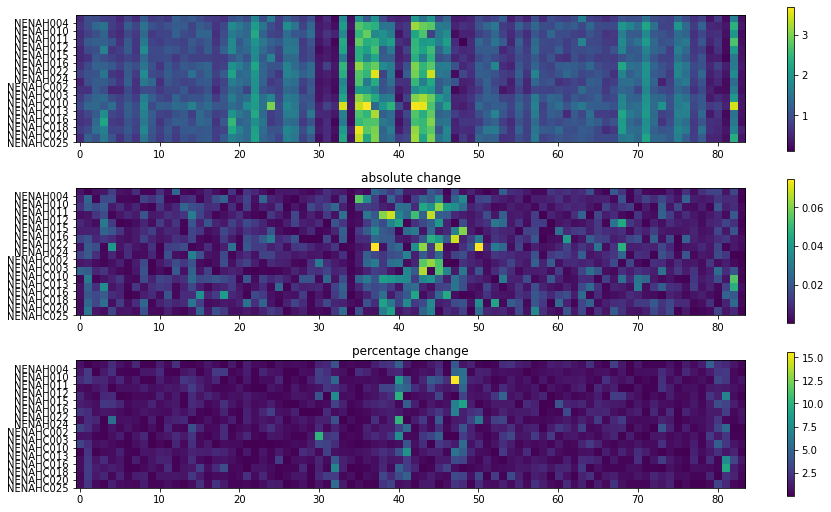

In [173]:
x = plt.figure(figsize=(15,9))
# x.tight_layout(pad=0)


plt.subplot(311)
plt.imshow(str_df_orig)
# plt.imshow(str_df_orig, vmin=0, vmax=3, cmap='viridis', aspect='auto')
plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
plt.colorbar()

plt.subplot(312)
plt.title("absolute change")
plt.imshow(strength_abs_change)
# plt.imshow(strength_abs_change, vmin=0, vmax=0.15, cmap='viridis', aspect='auto')
plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
plt.colorbar()

plt.subplot(313)
plt.title('percentage change')
plt.imshow(strength_pct_change)
plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
plt.colorbar()


plt.show()

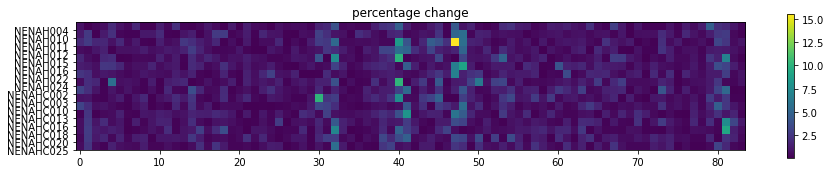

In [190]:
x = plt.figure(figsize=(15,9))
# x.tight_layout(pad=0)


# plt.subplot(311)
# plt.imshow(str_df_orig)
# # plt.imshow(str_df_orig, vmin=0, vmax=3, cmap='viridis', aspect='auto')
# plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
# plt.colorbar()

# plt.subplot(312)
# plt.title("absolute change")
# plt.imshow(strength_abs_change)
# # plt.imshow(strength_abs_change, vmin=0, vmax=0.15, cmap='viridis', aspect='auto')
# plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
# plt.colorbar()

plt.subplot(313)
plt.title('percentage change')
plt.imshow(strength_pct_change)
plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
plt.colorbar()


plt.show()

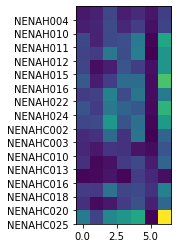

In [7]:
global_pct_change = pd.read_csv('global_pct_change.csv', index_col = 0)
plt.figure(figsize=(16,4))
plt.imshow(global_pct_change)
plt.colorbar()
# plt.xticks(np.arange(0.5, 7, 1), global_pct_change.columns)
plt.yticks(np.arange(0.5, 16, 1), global_pct_change.index)
plt.show()